# NAEP 2019 Data Mining Competition Dataset 

## Dataset Characteristics

**Has no GROUPING field**

* Has only a learning activity(question) field but no grouping field
* It could be argued that the Accession field can be used as grouping variable and the Observable field as learning activity variable
* If you use only the first occurence of a learning_sequence object (interactions = interactions.groupby([USER_FIELD, LEARNING_ACTIVITY_FIELD]).head(1)), the sequence distances between users group together -> similar paths -> this may be a non-selection criterion!

## Preliminaries

### Constants

In [1]:
# paths
PATH_TO_INTERACTION_DATA = '../../../../../data/NAEP_2019_educational_testing_service/data_a_train.csv'
PATH_TO_LABEL_DATA = '../../../../../data/NAEP_2019_educational_testing_service/data_train_label.csv'

# dataset name
DATASET_NAME = 'naep_2019_data_mining_competition'

# fields used in the analysis
USER_FIELD = 'STUDENTID'
GROUP_FIELD = None
LEARNING_ACTIVITY_FIELD = 'AccessionNumber'

# fields used in dataset preparation
TIMESTAMP_FIELD = 'EventTime'

### Import Packages

In [2]:
from utilities.sequence_similarity import *
from utilities.sequence_similarity_no_group import *
from utilities.functions import *
from utilities.constants import *

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import textdistance as td
import pickle

### Seaborn Configuration

In [3]:
sns.set(rc = {'figure.figsize':(15,8)})

In [4]:
#sns.set_context("notebook", rc={"font.size":20,"axes.titlesize":30,"axes.labelsize":20, "xtick.labelsize":16, "ytick.labelsize":16, "legend.fontsize":20, "legend.title_fontsize":20})   

In [5]:
sns.set_style("darkgrid")

In [6]:
marker_config = {"marker":"o",
                 "markerfacecolor":"white", 
                 "markeredgecolor":"black",
                 "markersize":"10"}

### Import Pickled Objects

In [7]:
# with open(PATH_TO_PICKLED_OBJECTS_FOLDER + DATASET_NAME + SEQUENCE_DISTANCE_DICT_PER_GROUP_PICKLE_NAME, 'rb') as f:
#     seq_dist_per_group_dict = pickle.load(f)

# with open(PATH_TO_PICKLED_OBJECTS_FOLDER + DATASET_NAME + SEQUENCE_DISTANCE_DICT_PICKLE_NAME, 'rb') as f:
#     seq_dist_dict = pickle.load(f)

## Functions

## Dataset Preparation

### Import Data

In [8]:
interactions = pd.read_csv(PATH_TO_INTERACTION_DATA)
labels = pd.read_csv(PATH_TO_LABEL_DATA)

In [9]:
interactions[TIMESTAMP_FIELD] = pd.to_datetime(interactions[TIMESTAMP_FIELD], errors='coerce')

In [ ]:
interactions

### Merge and Filter Data

In [10]:
interactions = interactions.merge(labels, how='inner', on=USER_FIELD)

### Filter Sequences by NAs in Dataset 

In [11]:
# only timestamps contain NAs
pct_na = get_nas_in_data(interactions)
pct_na

STUDENTID                                        0.0 %
Block                                            0.0 %
AccessionNumber                                  0.0 %
ItemType                                         0.0 %
Observable                                       0.0 %
ExtendedInfo                      42.097829980538044 %
EventTime                     0.00045631783449808465 %
EfficientlyCompletedBlockB                       0.0 %
dtype: object

In [12]:
interactions = drop_na_by_fields(interactions, field_list=[USER_FIELD, LEARNING_ACTIVITY_FIELD, TIMESTAMP_FIELD])

Input length: 438291
Outpunt length: 438289
Number of rows removed: 2
Percentage of rows removed: 0%


### Sort by Timestamp

In [13]:
interactions = sort_by_timestamp(interactions, TIMESTAMP_FIELD, higher_level_sort_list=[USER_FIELD])

### Transform Data

In [14]:
interactions = keep_last_repeated_learning_activities_no_group(interactions, USER_FIELD, LEARNING_ACTIVITY_FIELD, TIMESTAMP_FIELD)

100%|██████████| 1232/1232 [00:00<00:00, 4162.57it/s]

Initial number of interactions: 438289
Final number of interactions: 58668
Removed number of interactions: 379621
Removed percentage of interactions: 86.61431156154957%


## Summary Statistics and Plots 

In [15]:
print_summary_stats(interactions, USER_FIELD, GROUP_FIELD, LEARNING_ACTIVITY_FIELD, USER_FIELD_NAME_STR, GROUP_FIELD_NAME_STR, LEARNING_ACTIVITY_FIELD_NAME_STR, has_group_field=False)

number of interactions: 58668
number of unique Users: 1232
number of unique Learning Resources: 24


### Dataset Specific Characteristics

### Interactions per User

In [16]:
interactions_per_user = print_and_return_interactions_per_user(interactions, USER_FIELD, USER_FIELD_NAME_STR)

mean number of interactions per User: 47.62012987012987
median number of interactions per User: 37.0
max number of interactions per User: 188
min number of interactions per User: 8


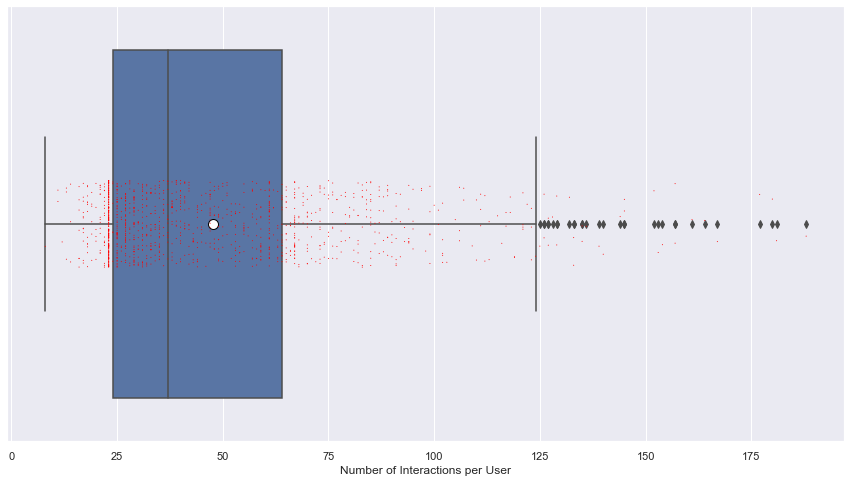

In [17]:
g = sns.boxplot(data=interactions_per_user, x='number of interactions', showmeans=True, meanprops=marker_config);
g = sns.stripplot(data=interactions_per_user, x='number of interactions', size=1, color="red");
g.set(xlabel='Number of Interactions per User');

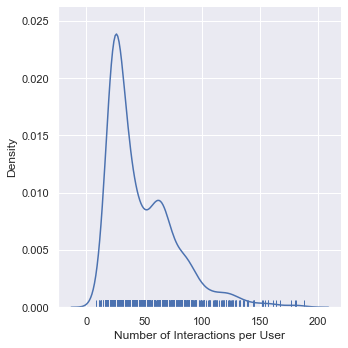

In [18]:
g = sns.displot(data=interactions_per_user, x='number of interactions', log_scale=False, kind='kde', rug=True)
g.set(xlabel='Number of Interactions per User');

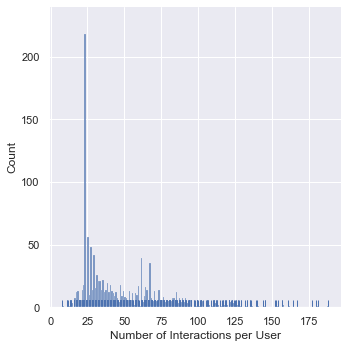

In [19]:
g = sns.displot(data=interactions_per_user, x='number of interactions', log_scale=False, kind='hist', rug=True, binwidth=1)
g.set(xlabel='Number of Interactions per User');

### Number of Unique Learning Activities per User

In [20]:
n_unique_learning_activities_per_user = print_and_return_unique_col2_per_col1(interactions, USER_FIELD, LEARNING_ACTIVITY_FIELD, NUMBER_UNIQUE_LEARNING_ACTIVITIES_PER_USER_STR)

mean Number of Unique Learning Resources per User: 21.0974025974026
median Number of Unique Learning Resources per User: 22.0
max Number of Unique Learning Resources per User: 24
min Number of Unique Learning Resources per User: 7


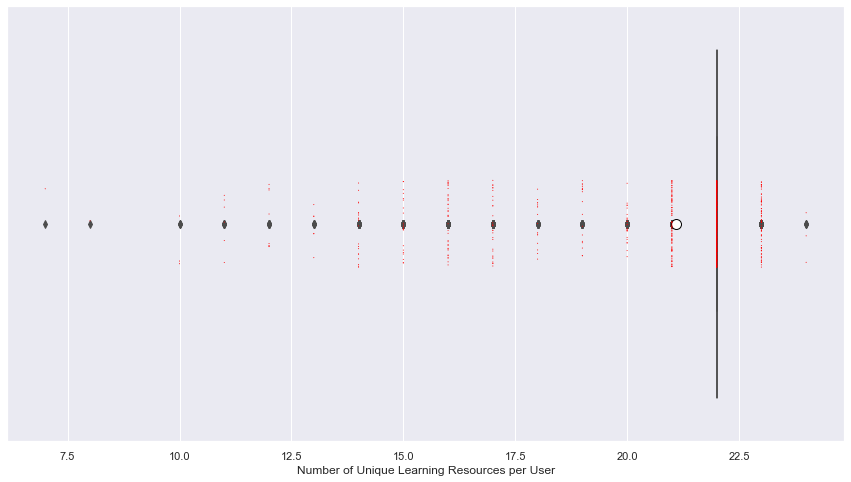

In [21]:
g = sns.boxplot(data=n_unique_learning_activities_per_user, x=NUMBER_UNIQUE_LEARNING_ACTIVITIES_PER_USER_STR, showmeans=True, meanprops=marker_config);
g = sns.stripplot(data=n_unique_learning_activities_per_user, x=NUMBER_UNIQUE_LEARNING_ACTIVITIES_PER_USER_STR, size=1, color="red");
g.set(xlabel=NUMBER_UNIQUE_LEARNING_ACTIVITIES_PER_USER_STR);

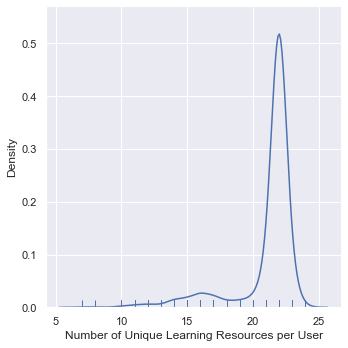

In [22]:
g = sns.displot(data=n_unique_learning_activities_per_user, x=NUMBER_UNIQUE_LEARNING_ACTIVITIES_PER_USER_STR, log_scale=False, kind='kde', rug=True)
g.set(xlabel=NUMBER_UNIQUE_LEARNING_ACTIVITIES_PER_USER_STR);

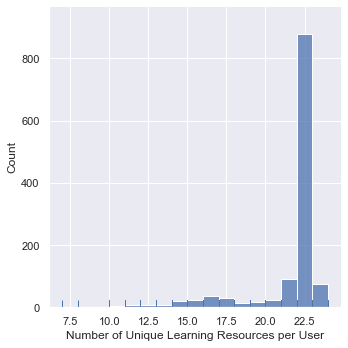

In [23]:
g = sns.displot(data=n_unique_learning_activities_per_user, x=NUMBER_UNIQUE_LEARNING_ACTIVITIES_PER_USER_STR, log_scale=False, kind='hist', rug=True, binwidth=1)
g.set(xlabel=NUMBER_UNIQUE_LEARNING_ACTIVITIES_PER_USER_STR);

### Number of Unique Users per Learning Activity

In [24]:
n_unique_users_per_learning_activity = print_and_return_unique_col2_per_col1(interactions, LEARNING_ACTIVITY_FIELD, USER_FIELD, NUMBER_UNIQUE_USERS_PER_LEARNING_ACTIVITY_STR)

mean Number of Unique Users per Learning Resource: 1083.0
median Number of Unique Users per Learning Resource: 1205.5
max Number of Unique Users per Learning Resource: 1232
min Number of Unique Users per Learning Resource: 64


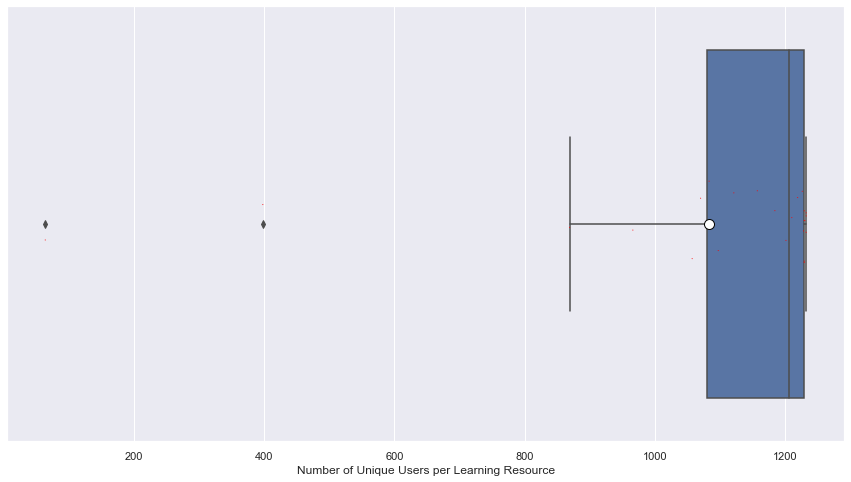

In [25]:
g = sns.boxplot(data=n_unique_users_per_learning_activity, x=NUMBER_UNIQUE_USERS_PER_LEARNING_ACTIVITY_STR, showmeans=True, meanprops=marker_config);
g = sns.stripplot(data=n_unique_users_per_learning_activity, x=NUMBER_UNIQUE_USERS_PER_LEARNING_ACTIVITY_STR, size=1, color="red");
g.set(xlabel=NUMBER_UNIQUE_USERS_PER_LEARNING_ACTIVITY_STR);

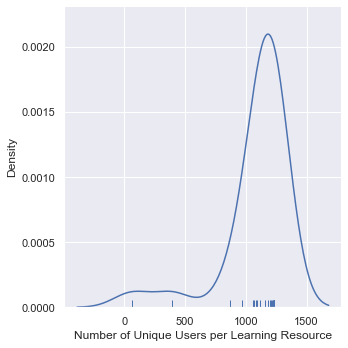

In [26]:
g = sns.displot(data=n_unique_users_per_learning_activity, x=NUMBER_UNIQUE_USERS_PER_LEARNING_ACTIVITY_STR, log_scale=False, kind='kde', rug=True)
g.set(xlabel=NUMBER_UNIQUE_USERS_PER_LEARNING_ACTIVITY_STR);

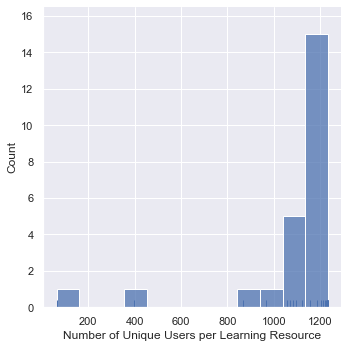

In [27]:
g = sns.displot(data=n_unique_users_per_learning_activity, x=NUMBER_UNIQUE_USERS_PER_LEARNING_ACTIVITY_STR, log_scale=False, kind='hist', rug=True)
g.set(xlabel=NUMBER_UNIQUE_USERS_PER_LEARNING_ACTIVITY_STR);

### Sparsity - User_Item_Matrix

#### User-Learning Activity

In [28]:
sparsity = calculate_sparsity(interactions[USER_FIELD], interactions[LEARNING_ACTIVITY_FIELD])
print(f"User-{LEARNING_ACTIVITY_FIELD_NAME_STR} Sparsity: {sparsity} %")

User-Learning Resource Sparsity: 12.094155844155836 %


## Unique Sequence Statistics

### Unique User Sequence Statistics

In [ ]:
learning_activity_sequence_stats = return_col2_sequence_stats_over_col1(interactions, 
                                                                        USER_FIELD, 
                                                                        LEARNING_ACTIVITY_FIELD,
                                                                        TIMESTAMP_FIELD,
                                                                        LEARNING_ACTIVITY_SEQUENCE_COUNT_NAME_STR,
                                                                        UNIQUE_LEARNING_ACTIVITY_SEQUENCE_COUNT_NAME_STR,
                                                                        LEARNING_ACTIVITY_SEQUENCE_NAME_STR,
                                                                        LEARNING_ACTIVITY_SEQUENCE_FREQUENCY_NAME_STR,
                                                                        LEARNING_ACTIVITY_SEQUENCE_FREQUENCY_PCT_NAME_STR,
                                                                        LEARNING_ACTIVITY_SEQUENCE_LENGTH_NAME_STR)

In [ ]:
plot_sequence_stats(learning_activity_sequence_stats,
                    LEARNING_ACTIVITY_SEQUENCE_COUNT_NAME_STR,
                    UNIQUE_LEARNING_ACTIVITY_SEQUENCE_COUNT_NAME_STR,
                    LEARNING_ACTIVITY_SEQUENCE_FREQUENCY_NAME_STR,
                    LEARNING_ACTIVITY_SEQUENCE_FREQUENCY_PCT_NAME_STR,
                    LEARNING_ACTIVITY_SEQUENCE_LENGTH_NAME_STR,
                    LEARNING_ACTIVITY_SEQUENCE_LENGTH_VS_FREQUENCY_PCT_TITLE_NAME_STR,
                    LEARNING_ACTIVITY_SEQUENCE_LENGTH_VS_FREQUENCY_TITLE_NAME_STR,
                    LEARNING_ACTIVITY_UNIQUE_VS_TOTAL_NUMBER_OF_SEQUENCES_TITLE_NAME_STR)

## Sequence Distance

### Sequence Distance between Users 

In [29]:
seq_sim = SeqSimNoGroup(interactions, USER_FIELD, LEARNING_ACTIVITY_FIELD)

In [30]:
seq_dist_dict = seq_sim.get_user_sequence_distances(td.levenshtein.distance, sample_pct=2)

--------------------------------------------------
total number of users: 1232
--------------------------------------------------
--------------------------------------------------
Sampling 2 percent of users:
Total number of users left: 25
--------------------------------------------------
--------------------------------------------------
Final number of users: 25
Final number of interactions: 7786
--------------------------------------------------


100%|██████████| 300/300 [01:19<00:00,  3.78it/s]


In [31]:
with open(PATH_TO_PICKLED_OBJECTS_FOLDER + DATASET_NAME + SEQUENCE_DISTANCE_DICT_PICKLE_NAME, "wb") as f:
    pickle.dump(seq_dist_dict, f, pickle.HIGHEST_PROTOCOL)

In [32]:
seq_dist_df = get_seq_dist_df(seq_dist_dict)

In [33]:
seq_dist_df

,user_name_combination,distance,normalized_distance,max_user_sequence_length_per_combination,mean_user_sequence_length_per_combination,mean_user_sequence_length,median_user_sequence_length
0,"[2333248361, 2333351049]",402,0.782101,514,327.5,306.28,269.0
1,"[2333248361, 2333128935]",74,0.400000,185,163.0,306.28,269.0
2,"[2333248361, 2333101336]",242,0.641910,377,259.0,306.28,269.0
3,"[2333248361, 2333008719]",104,0.525253,198,169.5,306.28,269.0
4,"[2333248361, 2333117836]",251,0.671123,374,257.5,306.28,269.0
...,...,...,...,...,...,...,...
295,"[2333048761, 2333269938]",336,0.698545,481,320.0,306.28,269.0
296,"[2333048761, 2333059640]",183,0.680297,269,214.0,306.28,269.0
297,"[2333341396, 2333269938]",349,0.725572,481,317.0,306.28,269.0
298,"[2333341396, 2333059640]",150,0.557621,269,211.0,306.28,269.0


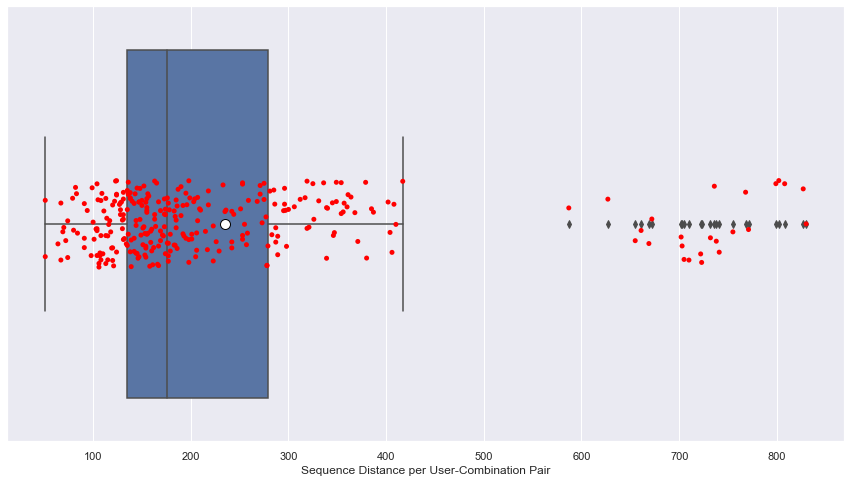

In [34]:
g = sns.boxplot(data=seq_dist_df, x='distance', showmeans=True, meanprops=marker_config);
g = sns.stripplot(data=seq_dist_df, x='distance', size=5, color="red");
g.set(xlabel=f'Sequence Distance per {USER_FIELD_NAME_STR}-Combination Pair');
plt.savefig(PATH_TO_PLOT_FOLDER + DATASET_NAME + '_seq_dist_per_user_combination_pair.png', dpi=300, bbox_inches='tight')

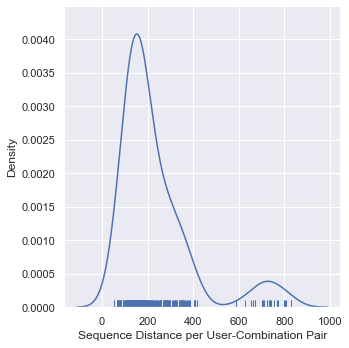

In [35]:
g = sns.displot(data=seq_dist_df, x='distance', log_scale=False, kind='kde', rug=True)
g.set(xlabel=f'Sequence Distance per {USER_FIELD_NAME_STR}-Combination Pair');

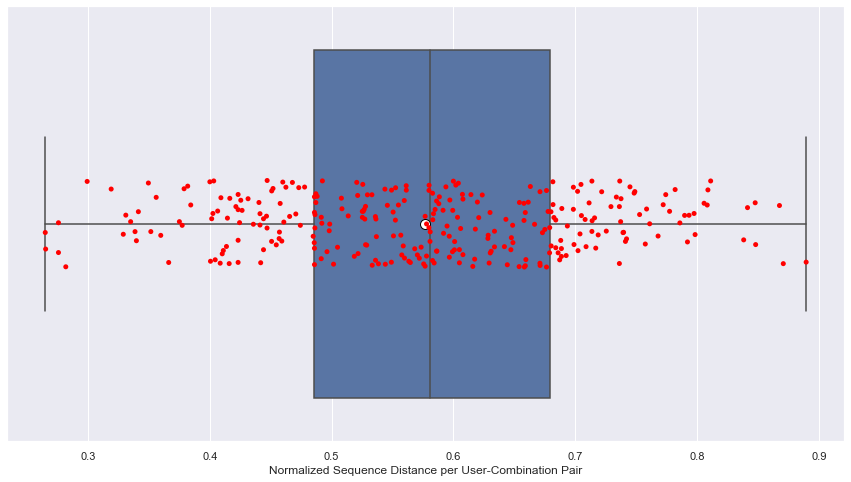

In [36]:
g = sns.boxplot(data=seq_dist_df, x='normalized_distance', showmeans=True, meanprops=marker_config);
g = sns.stripplot(data=seq_dist_df, x='normalized_distance', size=5, color="red");
g.set(xlabel=f'Normalized Sequence Distance per {USER_FIELD_NAME_STR}-Combination Pair');
plt.savefig(PATH_TO_PLOT_FOLDER + DATASET_NAME + '_normalized_seq_dist_per_user_combination_pair.png', dpi=300, bbox_inches='tight')

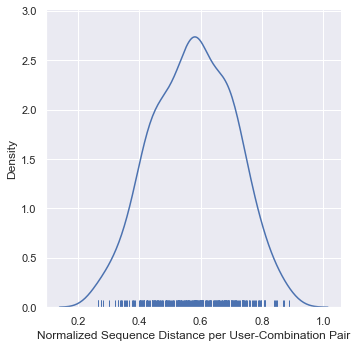

In [37]:
g = sns.displot(data=seq_dist_df, x='normalized_distance', log_scale=False, kind='kde', rug=True)
g.set(xlabel=f'Normalized Sequence Distance per {USER_FIELD_NAME_STR}-Combination Pair');

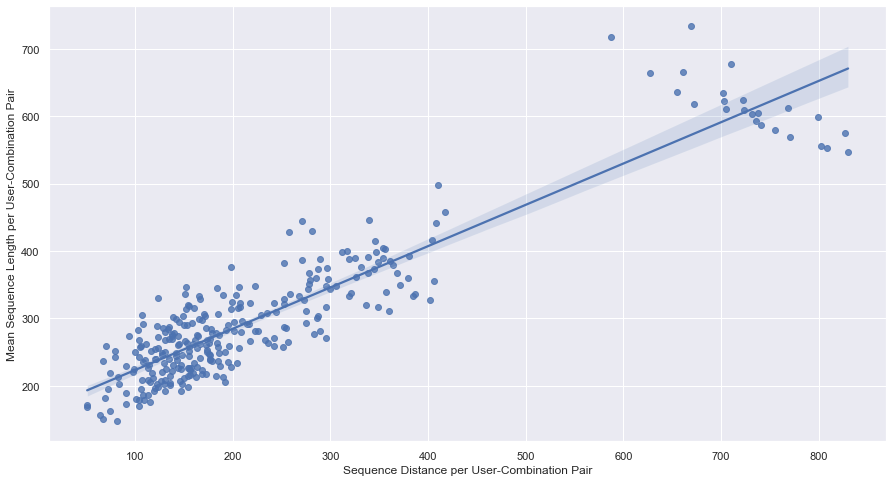

In [38]:
g = sns.regplot(data=seq_dist_df, x='distance', y='mean_user_sequence_length_per_combination')
g.set(xlabel=f'Sequence Distance per {USER_FIELD_NAME_STR}-Combination Pair', ylabel=f'Mean Sequence Length per {USER_FIELD_NAME_STR}-Combination Pair');

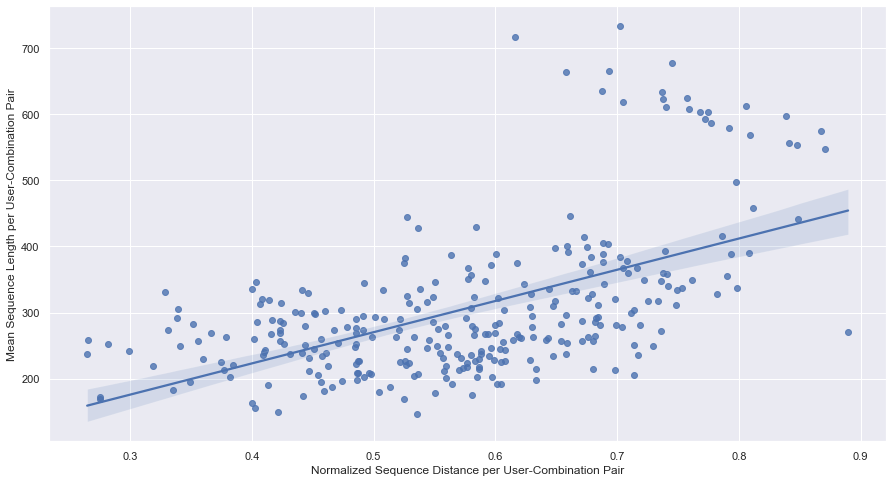

In [39]:
g = sns.regplot(data=seq_dist_df, x='normalized_distance', y='mean_user_sequence_length_per_combination')
g.set(xlabel=f'Normalized Sequence Distance per {USER_FIELD_NAME_STR}-Combination Pair', ylabel=f'Mean Sequence Length per {USER_FIELD_NAME_STR}-Combination Pair');

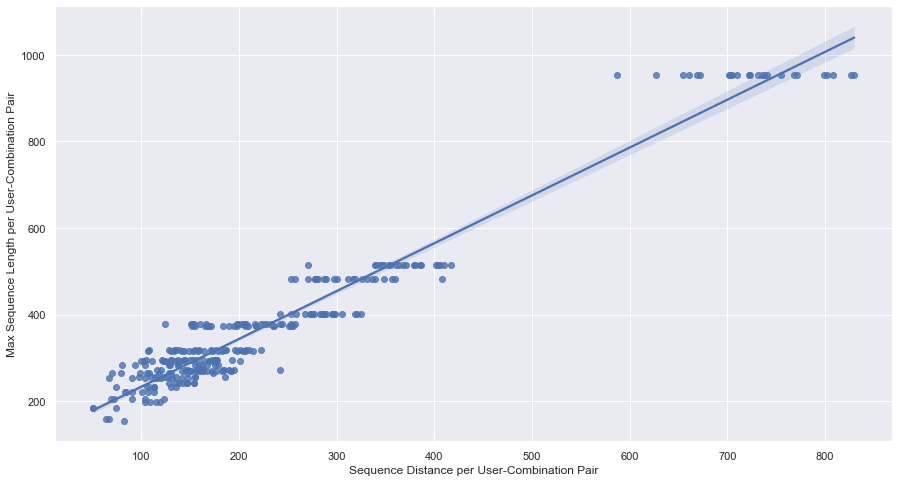

In [40]:
g = sns.regplot(data=seq_dist_df, x='distance', y='max_user_sequence_length_per_combination')
g.set(xlabel=f'Sequence Distance per {USER_FIELD_NAME_STR}-Combination Pair', ylabel=f'Max Sequence Length per {USER_FIELD_NAME_STR}-Combination Pair');

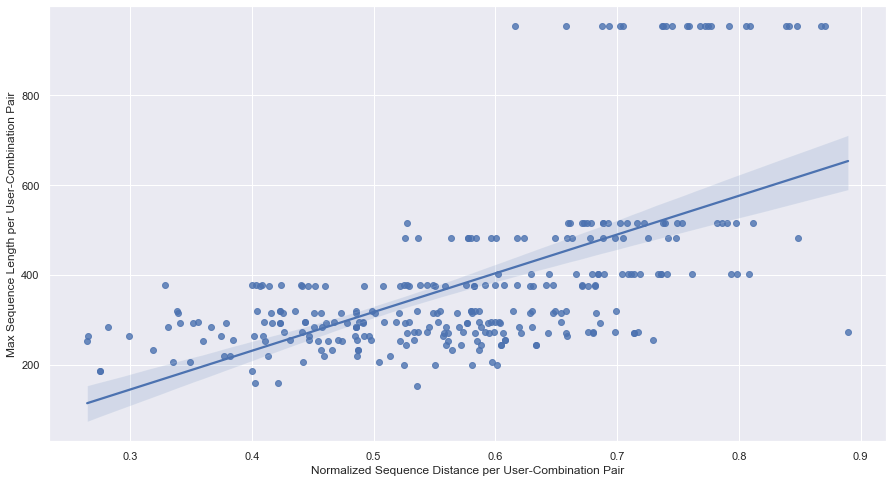

In [41]:
g = sns.regplot(data=seq_dist_df, x='normalized_distance', y='max_user_sequence_length_per_combination')
g.set(xlabel=f'Normalized Sequence Distance per {USER_FIELD_NAME_STR}-Combination Pair', ylabel=f'Max Sequence Length per {USER_FIELD_NAME_STR}-Combination Pair');